# WK14 Season(2024-2025) Football Player's Current Performance Analysis<hr style="border:2.4px solid #126782"> </hr>

Name: **Francis Gabriel T. Cayao** <br>
Course: **CPE2A**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv(r"..\raw\scoring_performance_24-25.csv",
                 delimiter=",")
df

,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Forward,Robert Lewandowski,185.0,right,LaLiga,FC Barcelona,1572.0,22.0,19.0,2.0
1,Forward,Kylian Mbappé,178.0,right,LaLiga,Real Madrid,1502.0,9.0,18.0,2.0
2,Forward,Harry Kane,188.0,right,Bundesliga,Bayern Munich,1455.0,20.0,18.0,9.0
3,Right Winger,Mohamed Salah,175.0,left,Premier League,Liverpool FC,1529.0,12.0,19.0,10.0
4,Forward,Erling Haaland,195.0,left,Premier League,Manchester City,1582.0,17.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4438,Back,Gerard Martín,186.0,left,LaLiga,FC Barcelona,501.0,0.0,13.0,2.0
4439,Left Winger,Tim Sousa,NaN,NaN,Liga Portugal,Rio Ave FC U23,803.0,0.0,11.0,0.0
4440,Back,Lukas Baert,186.0,left,Jupiler Pro League,KV Mechelen,450.0,0.0,5.0,0.0
4441,Back,Pau Cubarsí,184.0,right,LaLiga,FC Barcelona,1505.0,0.0,19.0,1.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4443 entries, 0 to 4442
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   position        4443 non-null   object 
 1   name            4443 non-null   object 
 2   height          4350 non-null   float64
 3   foot            4365 non-null   object 
 4   current league  4443 non-null   object 
 5   current club    4443 non-null   object 
 6   24/25 minutes   4267 non-null   float64
 7   24/25 goals     4267 non-null   float64
 8   24/25 games     4267 non-null   float64
 9   24/25 assists   4267 non-null   float64
dtypes: float64(5), object(5)
memory usage: 347.2+ KB


## Clean the dataset 

Determine the # of NaN values

In [71]:
df_w=df.copy()
df_w.isna().sum()

position            0
name                0
height             93
foot               78
current league      0
current club        0
24/25 minutes     176
24/25 goals       176
24/25 games       176
24/25 assists     176
dtype: int64

Replace certain rows with NaN values with 0 and drop the rows with missing values on the subsets **"height" and "foot"**

In [72]:
n_columns = ['24/25 minutes','24/25 goals','24/25 games','24/25 assists']

df_w[n_columns] = df_w[n_columns].fillna(0)

df_w.loc[:, n_columns] = df_w[n_columns].clip(lower=0)

df_w = df_w.dropna(subset=["foot","height"])

df_w.isna().sum()

position          0
name              0
height            0
foot              0
current league    0
current club      0
24/25 minutes     0
24/25 goals       0
24/25 games       0
24/25 assists     0
dtype: int64

In [73]:
df_w.to_csv(r"..\raw\scoring_performance_24-25_cleaned.csv", index=False)

### Measuring player performance **tendencies**

Take the **mean** of the minutes & games played as well as the goals & assists by the players

In [74]:
df_t=df_w.copy()
n_columns = ["24/25 minutes", "24/25 goals", "24/25 games", "24/25 assists"]

mean_n = df_t[n_columns].mean()
print("Mean:\n"+str(mean_n.round(2)))      


Mean:
24/25 minutes    643.97
24/25 goals        1.08
24/25 games       10.26
24/25 assists      0.82
dtype: float64


Return the **median** 

In [75]:
median_n = df_t[n_columns].median()
print("Median:\n" + str(median_n))

Median:
24/25 minutes    627.0
24/25 goals        0.0
24/25 games       11.0
24/25 assists      0.0
dtype: float64


Return the **mode**

In [76]:
mode_n = df_t[n_columns].mode().iloc[0]
print("Mode:\n" + str(mode_n))

Mode:
24/25 minutes     0.0
24/25 goals       0.0
24/25 games      12.0
24/25 assists     0.0
Name: 0, dtype: float64


### Measuring player performance's **variability**

In [77]:
df_v=df_t.copy()
df_v.describe()

,height,24/25 minutes,24/25 goals,24/25 games,24/25 assists
count,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000
mean,182.045718,643.967974,1.077976,10.258993,0.822000
std,6.467582,440.474790,1.908893,5.449459,1.326859
min,161.000000,0.000000,0.000000,0.000000,0.000000
25%,178.000000,270.000000,0.000000,6.000000,0.000000
50%,182.000000,627.000000,0.000000,11.000000,0.000000
75%,187.000000,980.000000,1.000000,14.000000,1.000000
max,206.000000,2190.000000,24.000000,26.000000,11.000000


Take the **Range** of the minutes & games played as well as the goals & assists by the players

In [78]:
v_columns = ["24/25 minutes", "24/25 goals", "24/25 games", "24/25 assists"]

range_v = df_v[v_columns].max() - df_v[v_columns].min()
print("Range: \n"+str(range_v))

Range: 
24/25 minutes    2190.0
24/25 goals        24.0
24/25 games        26.0
24/25 assists      11.0
dtype: float64


Return the **variance**

In [79]:
var_v = df_v[v_columns].var()
print("Variance:\n" + str(var_v.round(2)))

Variance:
24/25 minutes    194018.04
24/25 goals           3.64
24/25 games          29.70
24/25 assists         1.76
dtype: float64


Return the **standard deviation**

In [80]:
std_v = df_v[v_columns].std()
print("Variance:\n" + str(std_v.round(2)))

Variance:
24/25 minutes    440.47
24/25 goals        1.91
24/25 games        5.45
24/25 assists      1.33
dtype: float64


Return the **coefficient of variance**

In [81]:
cv_v = std_v/df_v[v_columns].mean()
print("Coefficient of Variance:\n" + str(cv_v.round(2)))

Coefficient of Variance:
24/25 minutes    0.68
24/25 goals      1.77
24/25 games      0.53
24/25 assists    1.61
dtype: float64


## Data Visualization

### Boxplot of minutes played

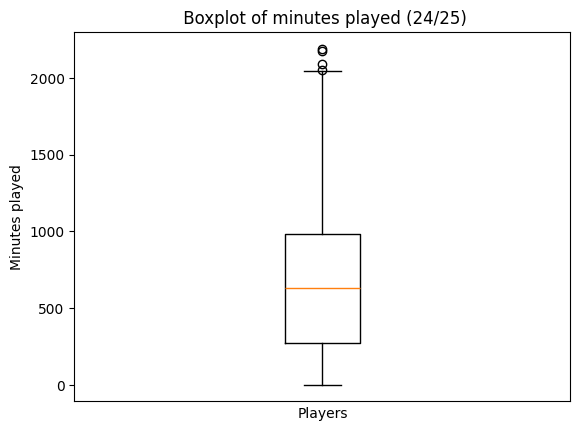

In [82]:
plt.boxplot(df_v['24/25 minutes'])
plt.title(" Boxplot of minutes played (24/25)")
plt.xlabel("Players")
plt.ylabel("Minutes played")
plt.xticks([])
plt.show()

### Boxplot of games played

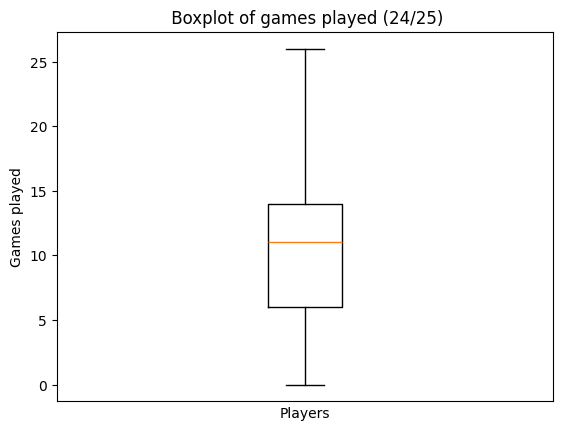

In [83]:
plt.boxplot(df_v['24/25 games'])
plt.title(" Boxplot of games played (24/25)")
plt.xlabel("Players")
plt.ylabel("Games played")
plt.xticks([])
plt.show()

### Boxplot of goals scored by players

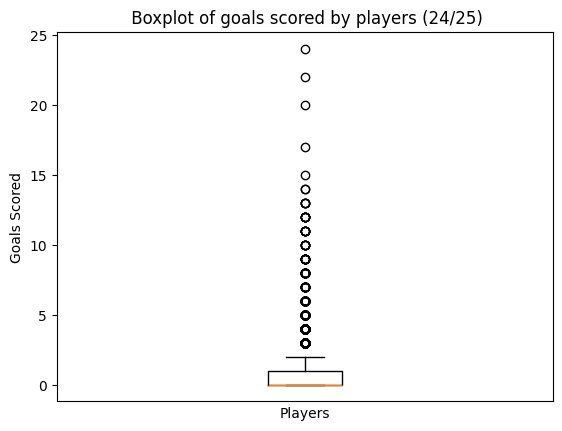

In [84]:
plt.boxplot(df_v['24/25 goals'])
plt.title(" Boxplot of goals scored by players (24/25)")
plt.xlabel("Players")
plt.ylabel("Goals Scored")
plt.xticks([])
plt.show()

### Boxplot of assists made by players

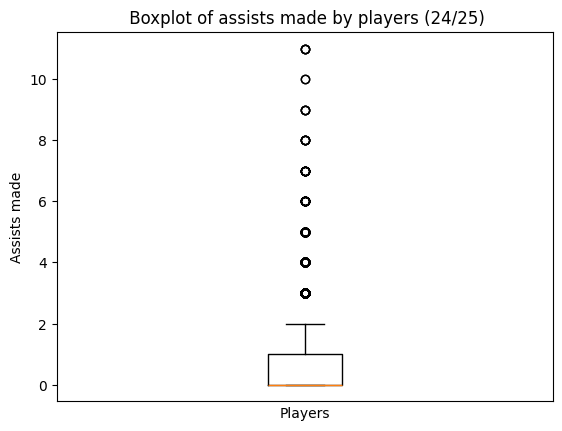

In [85]:
plt.boxplot(df_v['24/25 assists'])
plt.title(" Boxplot of assists made by players (24/25)")
plt.xlabel("Players")
plt.ylabel("Assists made")
plt.xticks([])
plt.show()

### Top scorers of the season (24/25)

Determine the distinct values for the **'currentleague'**

In [86]:
df_l = df_v.copy()
df_l['current league'].unique()

array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

Determine the top scorers of the different leagues

#### Top scorers in **La Liga**

In [87]:
df_l = df_l[df_l['current league']=='LaLiga']
df_l.reset_index(drop=True, inplace=True)
df_l

,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Forward,Robert Lewandowski,185.0,right,LaLiga,FC Barcelona,1572.0,22.0,19.0,2.0
1,Forward,Kylian Mbappé,178.0,right,LaLiga,Real Madrid,1502.0,9.0,18.0,2.0
2,Forward,Antoine Griezmann,176.0,left,LaLiga,Atlético de Madrid,1418.0,6.0,20.0,6.0
3,Forward,Iago Aspas,176.0,left,LaLiga,Celta de Vigo,981.0,4.0,13.0,3.0
4,Forward,Cristhian Stuani,184.0,right,LaLiga,Girona FC,329.0,4.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...
443,Back,Sergi Domínguez,191.0,right,LaLiga,FC Barcelona Atlètic,296.0,0.0,6.0,0.0
444,Defensive Midfield,Urko González de Zarate,189.0,right,LaLiga,Real Sociedad,135.0,0.0,2.0,0.0
445,Defensive Midfield,Marc Casadó,172.0,right,LaLiga,FC Barcelona,1305.0,0.0,17.0,5.0
446,Back,Gerard Martín,186.0,left,LaLiga,FC Barcelona,501.0,0.0,13.0,2.0


Determine the top 10 scorers of the league **"LaLiga"**

In [88]:
la_goals= df_l[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
la_goals.reset_index(drop=True, inplace=True)
la_goals

,name,current club,current league,height,foot,24/25 goals
0,Robert Lewandowski,FC Barcelona,LaLiga,185.0,right,22.0
1,Raphinha,FC Barcelona,LaLiga,176.0,left,13.0
2,Vinicius Junior,Real Madrid,LaLiga,176.0,right,12.0
3,Thierno Barry,Villarreal CF,LaLiga,195.0,right,11.0
4,Ayoze Pérez,Villarreal CF,LaLiga,178.0,right,10.0
5,Orri Óskarsson,Real Sociedad,LaLiga,186.0,right,10.0
6,Julián Alvarez,Atlético de Madrid,LaLiga,170.0,right,9.0
7,Kylian Mbappé,Real Madrid,LaLiga,178.0,right,9.0
8,Ante Budimir,CA Osasuna,LaLiga,190.0,left,8.0
9,Giovani Lo Celso,Real Betis Balompié,LaLiga,177.0,left,6.0


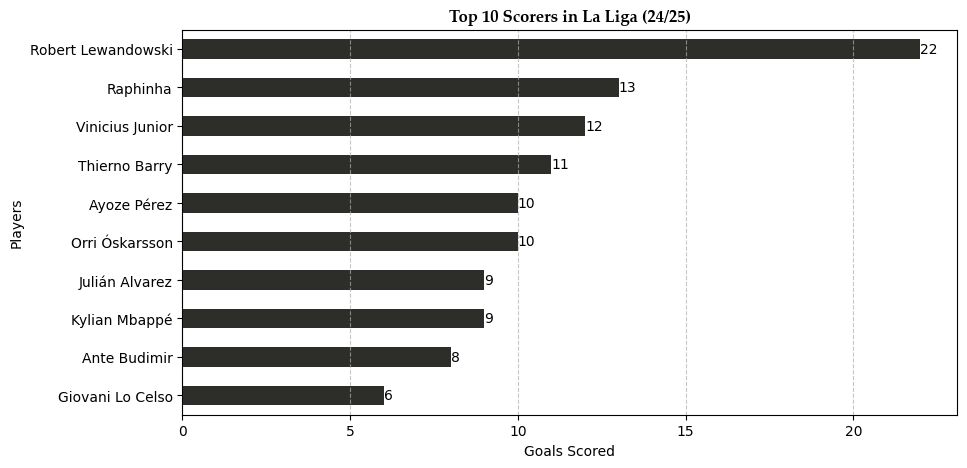

In [89]:
chart = la_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in La Liga (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(la_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

plt.show()

In [90]:
df_v['current league'].unique()

array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

#### Top scorers in **Bundesliga**

In [91]:
df_b = df_v.copy()

df_b = df_b[df_b['current league']=='Bundesliga']
df_b.reset_index(drop=True, inplace=True)
df_b

,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Forward,Harry Kane,188.0,right,Bundesliga,Bayern Munich,1455.0,20.0,18.0,9.0
1,Forward,Deniz Undav,179.0,both,Bundesliga,VfB Stuttgart,1030.0,7.0,16.0,1.0
2,Forward,Andrej Kramaric,177.0,right,Bundesliga,TSG 1899 Hoffenheim,1322.0,5.0,16.0,2.0
3,Left Winger,Marco Grüll,182.0,both,Bundesliga,SV Werder Bremen,421.0,1.0,11.0,0.0
4,Right Winger,Donyell Malen,176.0,right,Bundesliga,Borussia Dortmund,816.0,4.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...
429,Back,Ameen Al-Dakhil,187.0,right,Bundesliga,VfB Stuttgart,70.0,0.0,2.0,0.0
430,Back,Jeanuël Belocian,182.0,left,Bundesliga,Bayer 04 Leverkusen,231.0,0.0,6.0,0.0
431,Back,Arthur,174.0,right,Bundesliga,Bayer 04 Leverkusen,179.0,0.0,5.0,1.0
432,Back,Jordy Makengo,191.0,left,Bundesliga,SC Freiburg,127.0,0.0,6.0,0.0


Determine the top 10 scorers of the league **"Bundesliga"**

In [92]:
b_goals= df_b[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
b_goals.reset_index(drop=True, inplace=True)
b_goals

,name,current club,current league,height,foot,24/25 goals
0,Harry Kane,Bayern Munich,Bundesliga,188.0,right,20.0
1,Omar Marmoush,Eintracht Frankfurt,Bundesliga,183.0,right,15.0
2,Artem Stepanov,Bayer 04 Leverkusen U19,Bundesliga,192.0,right,11.0
3,Serhou Guirassy,Borussia Dortmund,Bundesliga,187.0,right,10.0
4,Hugo Ekitiké,Eintracht Frankfurt,Bundesliga,189.0,right,9.0
5,Jamal Musiala,Bayern Munich,Bundesliga,184.0,right,9.0
6,Florian Wirtz,Bayer 04 Leverkusen,Bundesliga,177.0,right,9.0
7,Victor Boniface,Bayer 04 Leverkusen,Bundesliga,190.0,right,8.0
8,Leon Opitz,SV Werder Bremen,Bundesliga,183.0,left,8.0
9,Jonathan Burkardt,1.FSV Mainz 05,Bundesliga,183.0,right,8.0


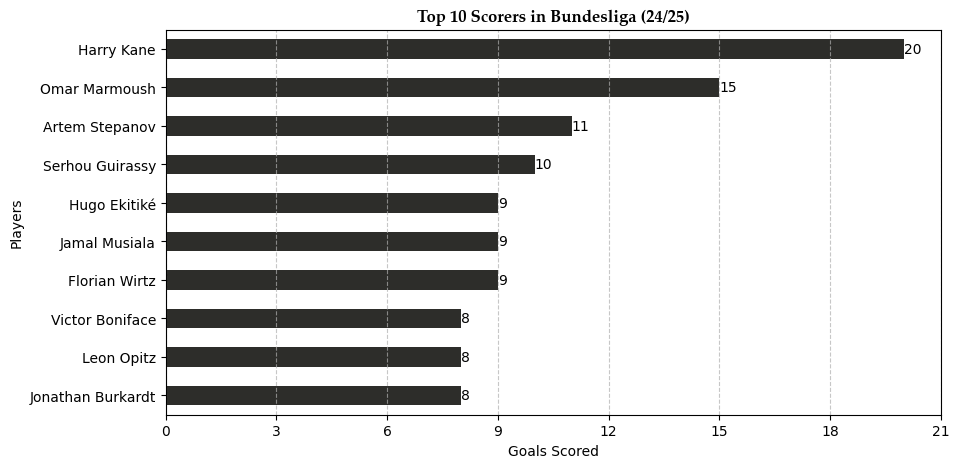

In [93]:
chart = b_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in Bundesliga (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

chart.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(b_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()


plt.show()

In [94]:
df_v['current league'].unique()

array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

#### Top scorers in **Premier League**

In [95]:
df_pre = df_v.copy()

df_pre = df_pre[df_pre['current league']=='Premier League']
df_pre.reset_index(drop=True, inplace=True)
df_pre

,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Right Winger,Mohamed Salah,175.0,left,Premier League,Liverpool FC,1529.0,12.0,19.0,10.0
1,Forward,Erling Haaland,195.0,left,Premier League,Manchester City,1582.0,17.0,18.0,0.0
2,Forward,Paul Onuachu,201.0,right,Premier League,Southampton FC,134.0,0.0,7.0,0.0
3,Left Winger,Heung-min Son,184.0,both,Premier League,Tottenham Hotspur,951.0,4.0,13.0,4.0
4,Attacking Midfield,Bruno Fernandes,179.0,right,Premier League,Manchester United,1580.0,4.0,19.0,7.0
...,...,...,...,...,...,...,...,...,...,...
460,Back,Nathaniel Clyne,175.0,right,Premier League,Crystal Palace,388.0,0.0,8.0,0.0
461,Defensive Midfield,Yunus Emre Konak,181.0,right,Premier League,Brentford FC,46.0,0.0,6.0,0.0
462,Back,Bastien Meupiyou,191.0,left,Premier League,Wolverhampton Wanderers,0.0,0.0,0.0,0.0
463,Defensive Midfield,Toby Collyer,180.0,right,Premier League,Manchester United,436.0,0.0,6.0,0.0


Determine the top 10 scorers of the league **"Premier League"**

In [96]:
pre_goals= df_pre[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
pre_goals.reset_index(drop=True, inplace=True)
pre_goals

,name,current club,current league,height,foot,24/25 goals
0,Erling Haaland,Manchester City,Premier League,195.0,left,17.0
1,Mohamed Salah,Liverpool FC,Premier League,175.0,left,12.0
2,Christopher Nkunku,Chelsea FC,Premier League,177.0,right,11.0
3,Luis Díaz,Liverpool FC,Premier League,180.0,right,9.0
4,Brennan Johnson,Tottenham Hotspur,Premier League,186.0,right,9.0
5,Jhon Durán,Aston Villa,Premier League,185.0,left,8.0
6,Kai Havertz,Arsenal FC,Premier League,193.0,left,8.0
7,Bryan Mbeumo,Brentford FC,Premier League,171.0,left,8.0
8,Chris Wood,Nottingham Forest,Premier League,191.0,right,8.0
9,Alejandro Garnacho,Manchester United,Premier League,180.0,right,8.0


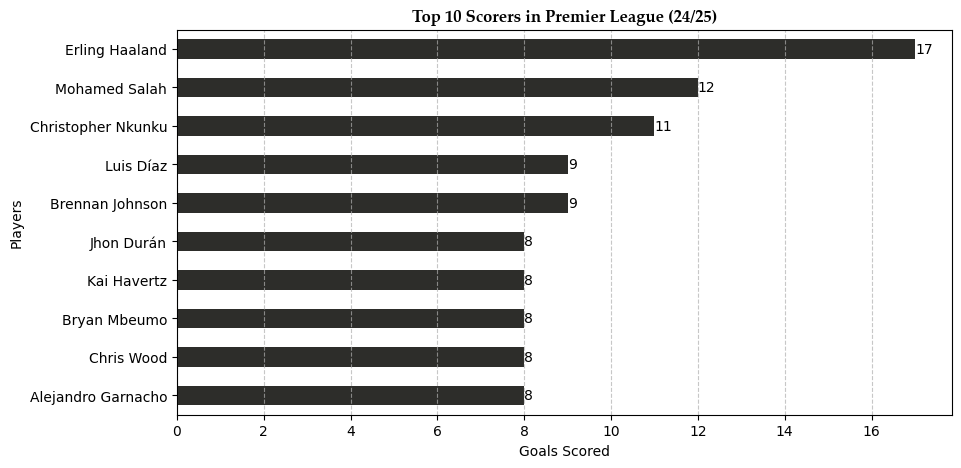

In [97]:
chart = pre_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in Premier League (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

chart.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(pre_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()


plt.show()

In [98]:
df_v['current league'].unique()


array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

#### Top scorers in **Süper Lig**

In [99]:
df_su= df_v.copy()

df_su = df_su[df_su['current league']=='Süper Lig']
df_su.reset_index(drop=True, inplace=True)
df_su


,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Forward,Ciro Immobile,185.0,right,Süper Lig,Besiktas JK,1357.0,12.0,18.0,0.0
1,Forward,Edin Dzeko,193.0,right,Süper Lig,Fenerbahce,1300.0,12.0,21.0,3.0
2,Forward,Mauro Icardi,181.0,right,Süper Lig,Galatasaray,1072.0,6.0,14.0,2.0
3,Left Winger,Dusan Tadic,181.0,left,Süper Lig,Fenerbahce,1628.0,8.0,21.0,9.0
4,Second Striker,Dries Mertens,169.0,right,Süper Lig,Galatasaray,1298.0,4.0,20.0,7.0
...,...,...,...,...,...,...,...,...,...,...
463,Back,Burhan Ersoy,187.0,right,Süper Lig,Adana Demirspor,0.0,0.0,0.0,0.0
464,Defensive Midfield,Niko Rak,173.0,right,Süper Lig,Konyaspor,0.0,0.0,0.0,0.0
465,Back,Murat Sipahioğlu,191.0,right,Süper Lig,Bodrum FK,0.0,0.0,0.0,0.0
466,Defensive Midfield,Efe Akman,175.0,right,Süper Lig,Galatasaray,16.0,0.0,2.0,0.0


Determine the top 10 scorers of the league **"Süper Lig"**

In [100]:
su_goals= df_su[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
su_goals.reset_index(drop=True, inplace=True)
su_goals

,name,current club,current league,height,foot,24/25 goals
0,Krzysztof Piatek,Basaksehir FK,Süper Lig,183.0,right,13.0
1,Ciro Immobile,Besiktas JK,Süper Lig,185.0,right,12.0
2,Edin Dzeko,Fenerbahce,Süper Lig,193.0,right,12.0
3,Simon Banza,Trabzonspor,Süper Lig,189.0,right,8.0
4,Dusan Tadic,Fenerbahce,Süper Lig,181.0,left,8.0
5,Victor Osimhen,Galatasaray,Süper Lig,186.0,right,8.0
6,João Figueiredo,Basaksehir FK,Süper Lig,180.0,right,7.0
7,Gedson Fernandes,Besiktas JK,Süper Lig,183.0,right,7.0
8,Yunus Akgün,Galatasaray,Süper Lig,173.0,left,6.0
9,Mame Thiam,Eyüpspor,Süper Lig,185.0,right,6.0


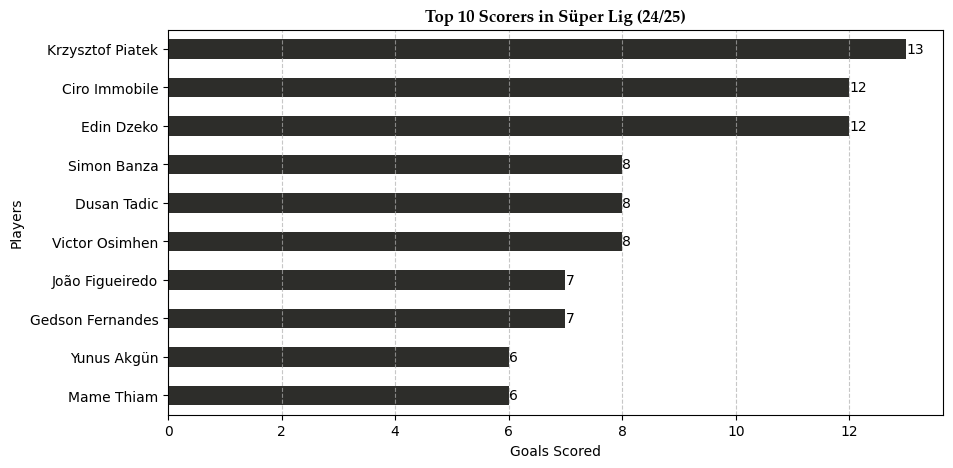

In [101]:
chart = su_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in Süper Lig (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

chart.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(su_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()


plt.show()

In [102]:
df_v['current league'].unique()

array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

#### Top scorers in **Serie A**

In [103]:
df_ser= df_v.copy()

df_ser = df_ser[df_ser['current league']=='Serie A']
df_ser.reset_index(drop=True, inplace=True)
df_ser


,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Forward,Romelu Lukaku,191.0,left,Serie A,SSC Napoli,815.0,5.0,12.0,5.0
1,Forward,Lautaro Martínez,174.0,right,Serie A,Inter Milan,1120.0,6.0,16.0,4.0
2,Forward,Mehdi Taremi,185.0,right,Serie A,Inter Milan,632.0,1.0,15.0,3.0
3,Forward,Álvaro Morata,189.0,right,Serie A,AC Milan,879.0,3.0,13.0,2.0
4,Forward,Tammy Abraham,194.0,right,Serie A,AC Milan,565.0,3.0,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...
497,Defensive Midfield,Lior Kasa,185.0,right,Serie A,Genoa CFC,426.0,0.0,6.0,1.0
498,Back,Saba Goglichidze,193.0,right,Serie A,FC Empoli,801.0,0.0,10.0,0.0
499,Back,Brandon Soppy,180.0,right,Serie A,Atalanta BC,0.0,0.0,0.0,0.0
500,Defensive Midfield,Joselito,184.0,right,Serie A,Hellas Verona,0.0,0.0,0.0,0.0


Determine the top 10 scorers of the league **"Serie A"**

In [104]:
ser_goals= df_ser[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
ser_goals.reset_index(drop=True, inplace=True)
ser_goals

,name,current club,current league,height,foot,24/25 goals
0,Mateo Retegui,Atalanta BC,Serie A,186.0,right,14.0
1,Moise Kean,ACF Fiorentina,Serie A,183.0,right,12.0
2,Marcus Thuram,Inter Milan,Serie A,192.0,right,10.0
3,Ademola Lookman,Atalanta BC,Serie A,174.0,right,9.0
4,Dušan Vlahović,Juventus FC,Serie A,190.0,left,9.0
5,Christian Pulisic,AC Milan,Serie A,177.0,right,8.0
6,Boulaye Dia,SS Lazio,Serie A,180.0,right,8.0
7,Taty Castellanos,SS Lazio,Serie A,178.0,right,7.0
8,Pedro,SS Lazio,Serie A,167.0,both,6.0
9,Mattia Zaccagni,SS Lazio,Serie A,177.0,right,6.0


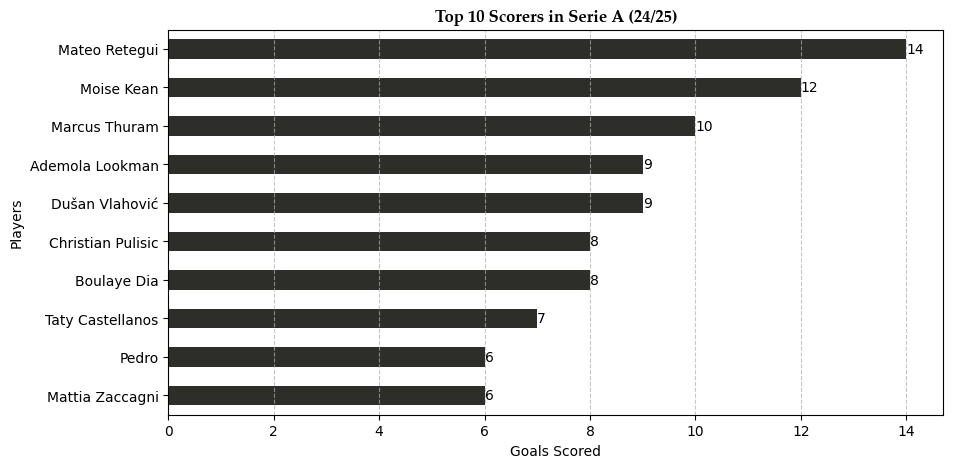

In [105]:
chart = ser_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in Serie A (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

chart.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(ser_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()


plt.show()

In [106]:
df_v['current league'].unique()

array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

#### Top scorers in **Ligue 1**

In [107]:
df_l1= df_v.copy()

df_l1 = df_l1[df_l1['current league']=='Ligue 1']
df_l1.reset_index(drop=True, inplace=True)
df_l1

,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Forward,Alexandre Lacazette,175.0,right,Ligue 1,Olympique Lyon,1062.0,5.0,15.0,2.0
1,Forward,Youssoufa Moukoko,179.0,left,Ligue 1,OGC Nice,483.0,2.0,11.0,2.0
2,Forward,Jonathan David,178.0,both,Ligue 1,LOSC Lille,1636.0,13.0,21.0,2.0
3,Forward,Folarin Balogun,178.0,right,Ligue 1,AS Monaco,496.0,3.0,9.0,1.0
4,Forward,Gaëtan Laborde,181.0,left,Ligue 1,OGC Nice,408.0,1.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...
419,Central Midfield,Ayyoub Bouaddi,186.0,right,Ligue 1,LOSC Lille,694.0,0.0,14.0,1.0
420,Back,Amidou Doumbouya,182.0,left,Ligue 1,OGC Nice,675.0,0.0,8.0,0.0
421,Back,Soumaïla Coulibaly,191.0,left,Ligue 1,Stade Brestois 29,679.0,0.0,9.0,1.0
422,Forward,Victor Orakpo,194.0,right,Ligue 1,OGC Nice,48.0,0.0,5.0,0.0


Determine the top 10 scorers of the league **"Ligue 1"**

In [108]:
l1_goals= df_l1[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
l1_goals.reset_index(drop=True, inplace=True)
l1_goals

,name,current club,current league,height,foot,24/25 goals
0,Jonathan David,LOSC Lille,Ligue 1,178.0,both,13.0
1,Bradley Barcola,Paris Saint-Germain,Ligue 1,182.0,right,10.0
2,Edon Zhegrova,LOSC Lille,Ligue 1,180.0,left,8.0
3,Mason Greenwood,Olympique Marseille,Ligue 1,181.0,both,8.0
4,Hamed Junior Traoré,AJ Auxerre,Ligue 1,177.0,right,6.0
5,Sebastian Nanasi,RC Strasbourg Alsace,Ligue 1,178.0,right,6.0
6,Keito Nakamura,Stade Reims,Ligue 1,180.0,right,6.0
7,Malick Fofana,Olympique Lyon,Ligue 1,169.0,right,6.0
8,Kang-in Lee,Paris Saint-Germain,Ligue 1,173.0,left,6.0
9,Evann Guessand,OGC Nice,Ligue 1,188.0,right,6.0


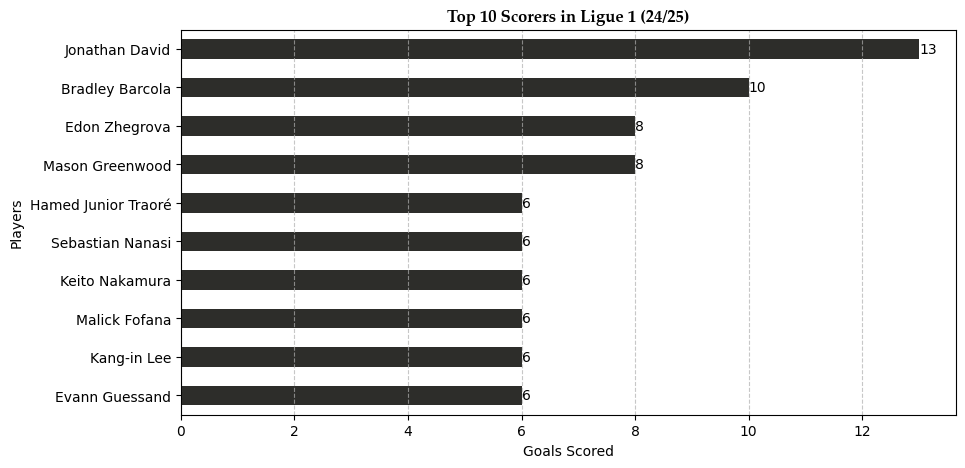

In [109]:
chart = l1_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in Ligue 1 (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

chart.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(l1_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()


plt.show()

In [110]:
df_v['current league'].unique()

array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

#### Top scorers in **Liga Portugal**

In [111]:
df_lp= df_v.copy()

df_lp = df_lp[df_lp['current league']=='Liga Portugal']
df_lp.reset_index(drop=True, inplace=True)
df_lp

,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Forward,Viktor Gyökeres,187.0,right,Liga Portugal,Sporting CP,1640.0,24.0,20.0,4.0
1,Forward,Vangelis Pavlidis,186.0,both,Liga Portugal,SL Benfica,1192.0,6.0,17.0,3.0
2,Forward,Arthur Cabral,186.0,right,Liga Portugal,SL Benfica,398.0,4.0,14.0,1.0
3,Left Winger,Ricardo Horta,173.0,right,Liga Portugal,SC Braga,2044.0,5.0,25.0,3.0
4,Right Winger,Ángel Di María,178.0,left,Liga Portugal,SL Benfica,1052.0,8.0,16.0,5.0
...,...,...,...,...,...,...,...,...,...,...
426,Back,Rivaldo,184.0,right,Liga Portugal,SC Farense,370.0,0.0,5.0,1.0
427,Central Midfield,Beni,180.0,right,Liga Portugal,Casa Pia AC,494.0,0.0,8.0,0.0
428,Right Winger,Samu,180.0,right,Liga Portugal,Casa Pia AC,0.0,0.0,0.0,0.0
429,Back,Paulo Victor,180.0,left,Liga Portugal,SC Farense,336.0,0.0,7.0,0.0


Determine the top 10 scorers of the league **"Liga Portugal"**

In [112]:
lp_goals= df_lp[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
lp_goals.reset_index(drop=True, inplace=True)
lp_goals

,name,current club,current league,height,foot,24/25 goals
0,Viktor Gyökeres,Sporting CP,Liga Portugal,187.0,right,24.0
1,Samu Aghehowa,FC Porto,Liga Portugal,193.0,right,12.0
2,Galeno,FC Porto,Liga Portugal,179.0,right,12.0
3,Kerem Aktürkoğlu,SL Benfica,Liga Portugal,173.0,right,11.0
4,Bruma,SC Braga,Liga Portugal,173.0,right,8.0
5,Conrad Harder,Sporting CP,Liga Portugal,185.0,left,8.0
6,Ángel Di María,SL Benfica,Liga Portugal,178.0,left,8.0
7,Amine El Ouazzani,SC Braga,Liga Portugal,188.0,right,7.0
8,Rodrigo Zalazar,SC Braga,Liga Portugal,178.0,right,6.0
9,Nuno Moreira,Casa Pia AC,Liga Portugal,175.0,right,6.0


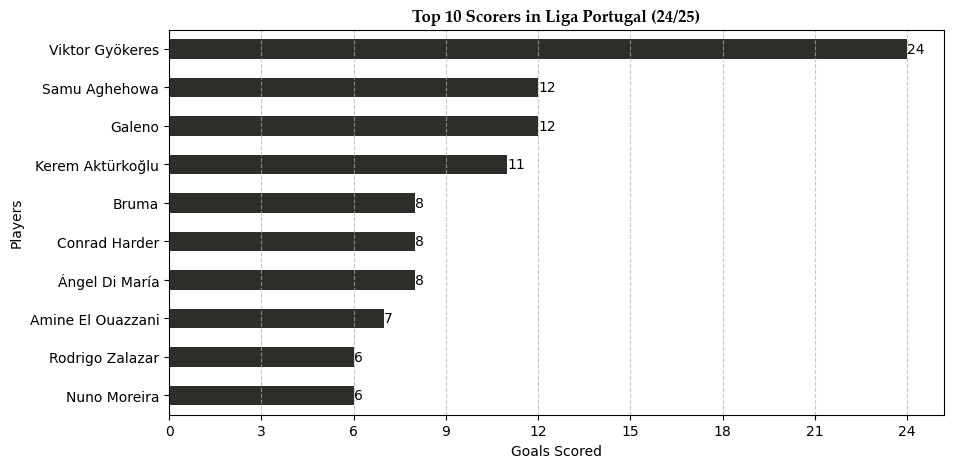

In [113]:
chart = lp_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in Liga Portugal (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

chart.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(lp_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()


plt.show()

In [114]:
df_v['current league'].unique()

array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

#### Top scorers in **Eredivisie**

In [115]:
df_ere= df_v.copy()

df_ere = df_ere[df_ere['current league']=='Eredivisie']
df_ere.reset_index(drop=True, inplace=True)
df_ere

,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Forward,Luuk de Jong,188.0,right,Eredivisie,PSV Eindhoven,1220.0,8.0,17.0,4.0
1,Forward,Wout Weghorst,197.0,right,Eredivisie,Ajax Amsterdam,458.0,4.0,12.0,1.0
2,Forward,Brian Brobbey,182.0,right,Eredivisie,Ajax Amsterdam,899.0,3.0,19.0,5.0
3,Right Winger,Steven Berghuis,182.0,left,Eredivisie,Ajax Amsterdam,537.0,1.0,12.0,3.0
4,Forward,Dylan Vente,185.0,right,Eredivisie,PEC Zwolle,1449.0,7.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...
388,Back,Oliver Braude,174.0,right,Eredivisie,SC Heerenveen,1096.0,0.0,15.0,0.0
389,Back,Max Bruns,186.0,right,Eredivisie,Twente Enschede FC,1279.0,0.0,16.0,0.0
390,Back,Brayann Pereira,172.0,right,Eredivisie,NEC Nijmegen,981.0,0.0,13.0,2.0
391,Defensive Midfield,Alonzo Engwanda,185.0,right,Eredivisie,FC Utrecht,426.0,0.0,5.0,0.0


Determine the top scorers of the league **"Eredivisie"**

In [116]:
ere_goals= df_ere[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
ere_goals.reset_index(drop=True, inplace=True)
ere_goals

,name,current club,current league,height,foot,24/25 goals
0,Ricardo Pepi,PSV Eindhoven,Eredivisie,185.0,right,11.0
1,Sem Steijn,Twente Enschede FC,Eredivisie,173.0,right,10.0
2,Troy Parrott,AZ Alkmaar,Eredivisie,185.0,right,8.0
3,Malik Tillman,PSV Eindhoven,Eredivisie,187.0,right,8.0
4,Luuk de Jong,PSV Eindhoven,Eredivisie,188.0,right,8.0
5,Sam Lammers,Twente Enschede FC,Eredivisie,191.0,both,7.0
6,Koki Ogawa,NEC Nijmegen,Eredivisie,186.0,right,7.0
7,Dylan Vente,PEC Zwolle,Eredivisie,185.0,right,7.0
8,Davy Klaassen,Ajax Amsterdam,Eredivisie,179.0,right,6.0
9,Mika Godts,Ajax Amsterdam,Eredivisie,176.0,right,6.0


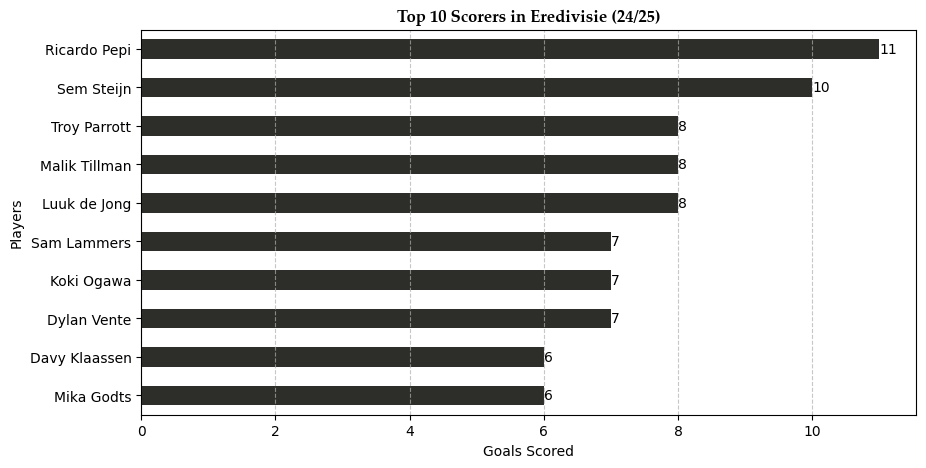

In [117]:
chart = ere_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in Eredivisie (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

chart.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(ere_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()


plt.show()

In [118]:
df_v['current league'].unique()

array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

#### Top scorers in **Premier Liga**

In [119]:
df_pliga= df_v.copy()

df_pliga = df_pliga[df_pliga['current league']=='Premier Liga']
df_pliga.reset_index(drop=True, inplace=True)
df_pliga

,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Forward,Ivan Sergeev,184.0,right,Premier Liga,Krylya Sovetov Samara,1018.0,1.0,16.0,1.0
1,Forward,Mirlind Daku,192.0,right,Premier Liga,Rubin Kazan,1404.0,8.0,17.0,4.0
2,Forward,Artem Dzyuba,197.0,right,Premier Liga,Akron Togliatti,554.0,2.0,9.0,3.0
3,Forward,Aleksandr Sobolev,195.0,right,Premier Liga,Zenit St. Petersburg,693.0,2.0,15.0,1.0
4,Forward,Jhon Córdoba,188.0,right,Premier Liga,FC Krasnodar,1211.0,8.0,16.0,5.0
...,...,...,...,...,...,...,...,...,...,...
375,Back,Eyad El Askalany,179.0,left,Premier Liga,FC Rostov,124.0,0.0,3.0,0.0
376,Back,Paulo Vitor,190.0,left,Premier Liga,Akron Togliatti,1428.0,0.0,17.0,0.0
377,Back,Nicolás Marichal,185.0,right,Premier Liga,Dynamo Moscow,1303.0,0.0,20.0,1.0
378,Back,Rizvan Utsiev,173.0,right,Premier Liga,Akhmat Grozny,437.0,0.0,6.0,0.0


Determine the top 10 scorers in the league **"Premier Liga"**

In [120]:
pliga_goals= df_pliga[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
pliga_goals.reset_index(drop=True, inplace=True)
pliga_goals

,name,current club,current league,height,foot,24/25 goals
0,Manfred Ugalde,Spartak Moscow,Premier Liga,173.0,right,13.0
1,Aleksey Batrakov,Lokomotiv Moscow,Premier Liga,168.0,right,11.0
2,Maksim Glushenkov,Zenit St. Petersburg,Premier Liga,179.0,left,9.0
3,Gamid Agalarov,Dinamo Makhachkala,Premier Liga,181.0,left,8.0
4,Tamerlan Musaev,CSKA Moscow,Premier Liga,186.0,right,8.0
5,Jhon Córdoba,FC Krasnodar,Premier Liga,188.0,right,8.0
6,Mirlind Daku,Rubin Kazan,Premier Liga,192.0,right,8.0
7,Egor Golenkov,FC Rostov,Premier Liga,189.0,right,8.0
8,Sergey Pinyaev,Lokomotiv Moscow,Premier Liga,167.0,both,7.0
9,Luciano Gondou,Zenit St. Petersburg,Premier Liga,189.0,left,7.0


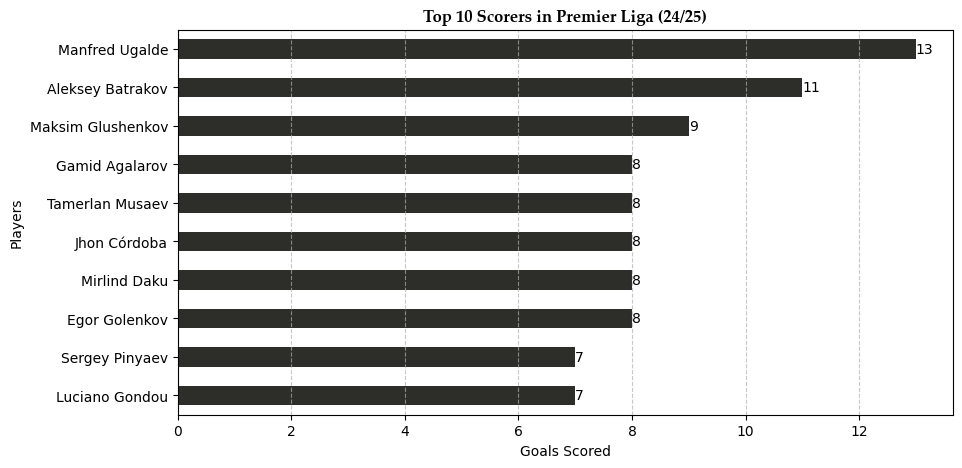

In [121]:
chart = pliga_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in Premier Liga (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

chart.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(pliga_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()


plt.show()

In [122]:
df_v['current league'].unique()

array(['LaLiga', 'Bundesliga', 'Premier League', 'Süper Lig', 'Serie A',
       'Ligue 1', 'Liga Portugal', 'Eredivisie', 'Premier Liga',
       'Jupiler Pro League'], dtype=object)

#### Top scorers in **Jupiler Pro League**

In [123]:
df_jpl= df_v.copy()

df_jpl = df_jpl[df_jpl['current league']=='Jupiler Pro League']
df_jpl.reset_index(drop=True, inplace=True)
df_jpl

,position,name,height,foot,current league,current club,24/25 minutes,24/25 goals,24/25 games,24/25 assists
0,Right Winger,Anders Dreyer,174.0,left,Jupiler Pro League,RSC Anderlecht,1507.0,3.0,20.0,7.0
1,Attacking Midfield,Hans Vanaken,195.0,right,Jupiler Pro League,Club Brugge KV,1936.0,6.0,22.0,7.0
2,Right Winger,Andreas Skov Olsen,187.0,left,Jupiler Pro League,Club Brugge KV,1188.0,5.0,20.0,3.0
3,Forward,Kasper Dolberg,187.0,right,Jupiler Pro League,RSC Anderlecht,1495.0,14.0,22.0,2.0
4,Attacking Midfield,Tjaronn Chery,171.0,left,Jupiler Pro League,Royal Antwerp FC,1295.0,9.0,16.0,6.0
...,...,...,...,...,...,...,...,...,...,...
359,Back,Cheick Thiam,194.0,right,Jupiler Pro League,Beerschot VA,270.0,0.0,3.0,0.0
360,Back,Lucas Noubi,184.0,right,Jupiler Pro League,Standard Liège,136.0,0.0,2.0,0.0
361,Back,Souleyman Doumbia,183.0,left,Jupiler Pro League,Standard Liège,97.0,0.0,3.0,0.0
362,Back,José Marsà,185.0,left,Jupiler Pro League,KV Mechelen,1246.0,0.0,16.0,1.0


Determine the top 10 scorers of the league **"Jupiler Pro League"**

In [124]:
jpl_goals= df_jpl[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
jpl_goals.reset_index(drop=True, inplace=True)
jpl_goals

,name,current club,current league,height,foot,24/25 goals
0,Kasper Dolberg,RSC Anderlecht,Jupiler Pro League,187.0,right,14.0
1,Kévin Denkey,Cercle Brugge,Jupiler Pro League,181.0,right,11.0
2,Tjaronn Chery,Royal Antwerp FC,Jupiler Pro League,171.0,left,9.0
3,Max Dean,KAA Gent,Jupiler Pro League,178.0,right,9.0
4,Omri Gandelman,KAA Gent,Jupiler Pro League,188.0,left,9.0
5,Tolu Arokodare,KRC Genk,Jupiler Pro League,197.0,right,9.0
6,Christos Tzolis,Club Brugge KV,Jupiler Pro League,179.0,right,8.0
7,Daan Heymans,R Charleroi SC,Jupiler Pro League,189.0,right,8.0
8,Adriano Bertaccini,Sint-Truidense VV,Jupiler Pro League,173.0,right,8.0
9,Jarne Steuckers,KRC Genk,Jupiler Pro League,179.0,left,7.0


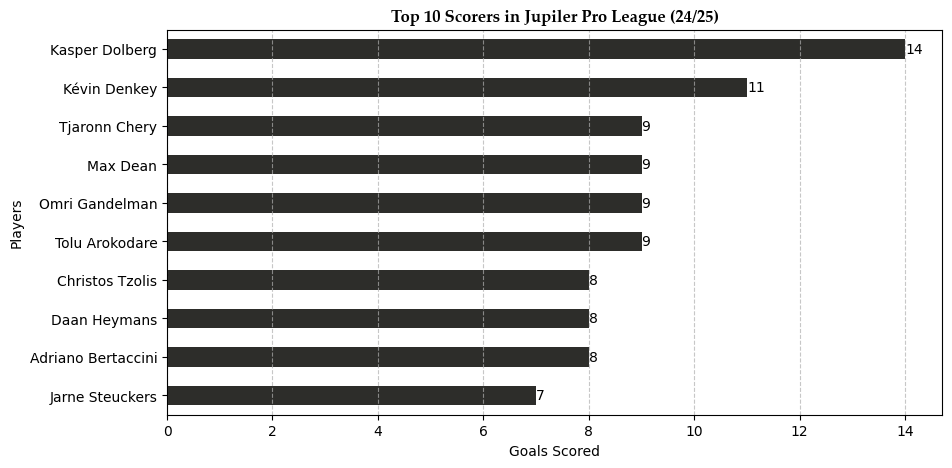

In [125]:
chart = jpl_goals.plot(kind='barh',
                      x='name', 
                      y='24/25 goals',
                      color=['#2D2D2A'],
                      figsize=(10, 5),
                      legend=False)

chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top 10 Scorers in Jupiler Pro League (24/25)', 
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')

chart.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Goals Scored')
plt.ylabel('Players')
chart.set_yticklabels(jpl_goals['name'], rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()


plt.show()

#### Top Scorers - All Leagues

In [126]:
df_g = df_v.copy()
goals= df_g[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
goals.reset_index(drop=True, inplace=True)
goals

,name,current club,current league,height,foot,24/25 goals
0,Viktor Gyökeres,Sporting CP,Liga Portugal,187.0,right,24.0
1,Robert Lewandowski,FC Barcelona,LaLiga,185.0,right,22.0
2,Harry Kane,Bayern Munich,Bundesliga,188.0,right,20.0
3,Erling Haaland,Manchester City,Premier League,195.0,left,17.0
4,Omar Marmoush,Eintracht Frankfurt,Bundesliga,183.0,right,15.0
5,Kasper Dolberg,RSC Anderlecht,Jupiler Pro League,187.0,right,14.0
6,Mateo Retegui,Atalanta BC,Serie A,186.0,right,14.0
7,Krzysztof Piatek,Basaksehir FK,Süper Lig,183.0,right,13.0
8,Raphinha,FC Barcelona,LaLiga,176.0,left,13.0
9,Manfred Ugalde,Spartak Moscow,Premier Liga,173.0,right,13.0


Generally, players who are tall and is right footed had currently scored the most goals in the current season (24/25), which suggests that their height and quite possibly their dominant foot influenced their scoring capacity

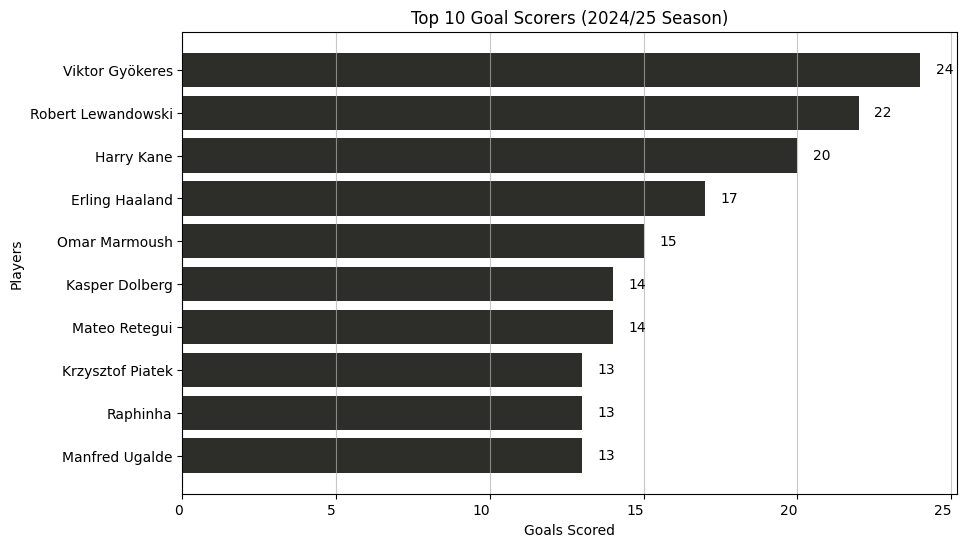

In [127]:

plt.figure(figsize=(10,6))
bar=plt.barh(goals['name'], goals['24/25 goals'], color=['#2D2D2A'])
plt.ylabel("Players")
plt.xlabel("Goals Scored")
plt.title("Top 10 Goal Scorers (2024/25 Season)")
plt.xticks( ha='right') 
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.gca().invert_yaxis()

for bar, value in zip(bar, goals['24/25 goals']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f"{int(value)}", va='center')

plt.show()

### Players with the most Goal contributions (goals+assists) - All Leagues

Return the top 10 **scorers in all leagues**

In [128]:
df_g = df_v.copy()
goals= df_g[['name', 'current club','current league','height','foot', '24/25 goals']].sort_values(by='24/25 goals', ascending=False).head(10)
goals.reset_index(drop=True, inplace=True)
goals

,name,current club,current league,height,foot,24/25 goals
0,Viktor Gyökeres,Sporting CP,Liga Portugal,187.0,right,24.0
1,Robert Lewandowski,FC Barcelona,LaLiga,185.0,right,22.0
2,Harry Kane,Bayern Munich,Bundesliga,188.0,right,20.0
3,Erling Haaland,Manchester City,Premier League,195.0,left,17.0
4,Omar Marmoush,Eintracht Frankfurt,Bundesliga,183.0,right,15.0
5,Kasper Dolberg,RSC Anderlecht,Jupiler Pro League,187.0,right,14.0
6,Mateo Retegui,Atalanta BC,Serie A,186.0,right,14.0
7,Krzysztof Piatek,Basaksehir FK,Süper Lig,183.0,right,13.0
8,Raphinha,FC Barcelona,LaLiga,176.0,left,13.0
9,Manfred Ugalde,Spartak Moscow,Premier Liga,173.0,right,13.0


Determine the top 10 players with the **most assists in all leagues**

#### Players with the most assists in the season (24/25) - All Leagues

In [129]:
df_a = df_g.copy()
assists= df_g[['name', 'current club','current league', '24/25 assists']].sort_values(by='24/25 assists', ascending=False).head(10)
assists.reset_index(drop=True, inplace=True)
assists

,name,current club,current league,24/25 assists
0,Wendel,Zenit St. Petersburg,Premier Liga,11.0
1,Omar Marmoush,Eintracht Frankfurt,Bundesliga,11.0
2,Igor Paixão,Feyenoord Rotterdam,Eredivisie,11.0
3,Trincão,Sporting CP,Liga Portugal,11.0
4,Raphinha,FC Barcelona,LaLiga,10.0
5,Mohamed Salah,Liverpool FC,Premier League,10.0
6,Bukayo Saka,Arsenal FC,Premier League,9.0
7,Charles De Ketelaere,Atalanta BC,Serie A,9.0
8,Harry Kane,Bayern Munich,Bundesliga,9.0
9,Dusan Tadic,Fenerbahce,Süper Lig,9.0


#### Players with the most goal contributions (goals+assists)

Calculate all the player's **goal contribution**

In [130]:
df_ga = df_a.copy()
df_ga['goal contribution']=df_ga['24/25 goals'] + df_ga['24/25 assists']
contri= df_ga[['name', 'current club','24/25 goals','24/25 assists','goal contribution']].sort_values(by=['goal contribution','24/25 goals'], ascending=[False, False]).head(10)
contri.reset_index(drop=True, inplace=True)
contri

,name,current club,24/25 goals,24/25 assists,goal contribution
0,Harry Kane,Bayern Munich,20.0,9.0,29.0
1,Viktor Gyökeres,Sporting CP,24.0,4.0,28.0
2,Omar Marmoush,Eintracht Frankfurt,15.0,11.0,26.0
3,Robert Lewandowski,FC Barcelona,22.0,2.0,24.0
4,Raphinha,FC Barcelona,13.0,10.0,23.0
5,Mohamed Salah,Liverpool FC,12.0,10.0,22.0
6,Vinicius Junior,Real Madrid,12.0,8.0,20.0
7,Aleksey Batrakov,Lokomotiv Moscow,11.0,8.0,19.0
8,Erling Haaland,Manchester City,17.0,0.0,17.0
9,Mateo Retegui,Atalanta BC,14.0,3.0,17.0


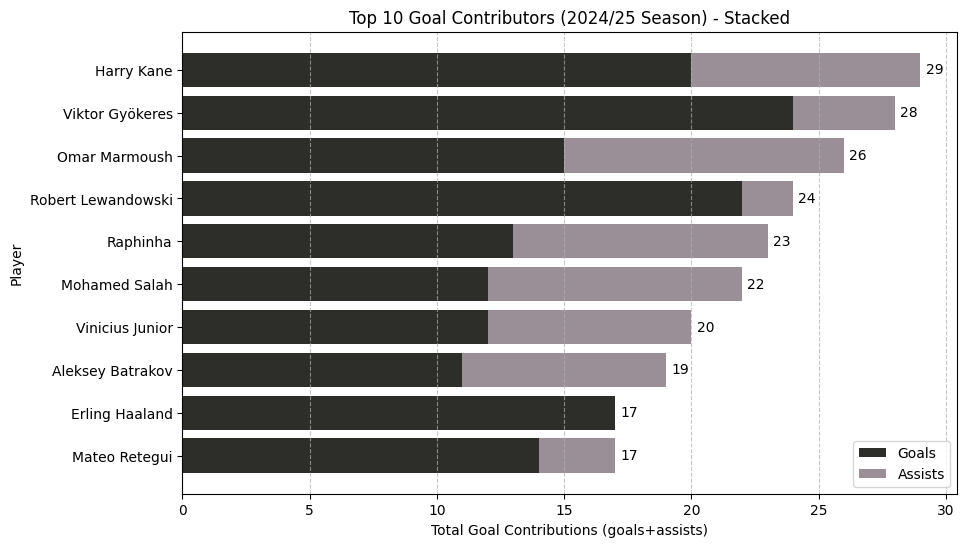

In [131]:
plt.figure(figsize=(10,6))
plt.barh(contri['name'], contri['24/25 goals'], color='#2D2D2A', label='Goals')
plt.barh(contri['name'], contri['24/25 assists'], left=contri['24/25 goals'], color='#9A8F97', label='Assists')

plt.ylabel("Player")
plt.xlabel("Total Goal Contributions (goals+assists)")
plt.title("Top 10 Goal Contributors (2024/25 Season) - Stacked")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().invert_yaxis()
plt.legend()


# Add text labels for total contributions
for i, (goals, assists, total) in enumerate(zip(contri['24/25 goals'], contri['24/25 assists'], contri['goal contribution'])):
    plt.text(total + 0.2, i, f"{int(total)}", va='center')

plt.show()


This bar graph displays the top 10 players with the highest goal contributions in the 2024/25 season. Goal contributions are calculated as the sum of goals and assists, while both are important, goals are used as a tiebreaker when players have the same total contribution, meaning goals have a slight priority in ranking.

### Clubs with the highest goal contribution in relation to the minutes played by club members

In [132]:
df_club = df_ga.copy()
df_club['goal contribution'] = df_club['24/25 goals'] + df_club['24/25 assists']
df_club = df_club[~df_club['current club'].str.contains('U19', case=False, na=False)]

# Compute weighted mean per club
def weighted_mean(group):
    return (group['goal contribution'] * group['24/25 minutes']).sum() / group['24/25 minutes'].sum()
club_contrib =  df_club.groupby('current club', group_keys=False)[['goal contribution', '24/25 minutes']].apply(weighted_mean)


club_contrib = club_contrib.round(2).sort_values(ascending=False)
print(club_contrib.head(10))

current club
FC Barcelona        8.07
Sporting CP         7.76
Bayern Munich       6.17
PSV Eindhoven       5.90
SL Benfica          5.60
Liverpool FC        5.27
Lokomotiv Moscow    5.25
Galatasaray         5.14
Fenerbahce          5.12
Besiktas JK         5.03
dtype: float64


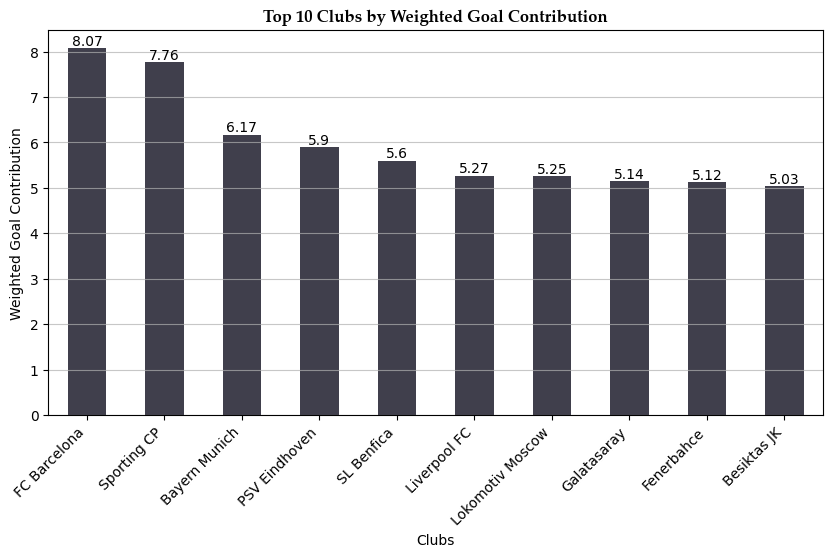

In [133]:
chart = club_contrib.head(10).plot(kind='bar',  
                                   color=['#403F4C'],  
                                   figsize=(10, 5))  
chart.bar_label(chart.containers[0], label_type='edge')  
plt.title('Top 10 Clubs by Weighted Goal Contribution',  
          fontfamily='Palatino Linotype',  
          fontsize=12,  
          fontweight='bold')  
plt.xlabel('Clubs')  
chart.set_xticklabels(club_contrib.head(10).index, rotation=45, ha='right')  
plt.ylabel('Weighted Goal Contribution')  
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

These are the top 10 clubs with players who had the highest weighted goal contribution in the current season (2024/25). The rankings were determined using each club's weighted goal contribution(goal+assists), which ensures that players with more minutes played have a higher influence in their club's final standings.